In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# functions that would be used for later works in here... (I also defined functions again, in cells where each function is needed.)


def classification(dataframe):
    types = {'0_1':'HIT-HC', '0_2':'HIT-LC', '0_3':'MISS-LC', '0_4':'MISS-HC', '1_1':'FA-HC', '1_2':'FA-LC', '1_3':'CR-LC', '1_4':'CR-HC'}
    result = []
    for i in range(len(dataframe)):
        row = dataframe.iloc[i, :]
        tmp = types['{}_{}'.format(int(row['Task_Type']), int(row['Res1']))]
        result.append(tmp)
    return result    


def make_sort(subjectID):
    categories_old = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC']
    categories_new = ['FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']

    df = pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(subjectID, subjectID), sep='\t', index_col = False)
    df_old_only = df[df['Task_Type']==0]
    df_new_only = df[df['Task_Type']==1]

    df_old_only['Response'] = classification(df_old_only)
    df_new_only['Response'] = classification(df_new_only)
    
    df_old_only_tmp = df_old_only['Response'].value_counts(normalize = True).sort_values().reindex(categories_old)
    df_new_only_tmp = df_new_only['Response'].value_counts(normalize = True).sort_values().reindex(categories_new)

    df_probability = pd.concat([df_old_only_tmp, df_new_only_tmp], axis=0)
    
    return df_probability


def calculate_memory_score(subjectID):
    test = pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(subjectID, subjectID), sep='\t', index_col = False)
    test = test[test['Task_Type'] == 0]
    test['Response'] = classification(test)
    test = test[test['Res2']!=5]
    study = pd.read_csv('./DMdata/DM{}/DM{}_study.txt'.format(subjectID, subjectID), sep='\t', index_col = False)
    
    old_category_types = {'HIT-HC':[], 'HIT-LC':[], 'MISS-LC':[], 'MISS-HC':[]}
    categories_old = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC']
    
    for category in categories_old:
        test_tmp = test[test['Response']==category].reset_index()
        cnt = 0
        
        for i in range(len(test_tmp)):
            Obj_ID = test_tmp.loc[i, 'Object_ID']
            cnt += (test_tmp.loc[i, 'Res2'] == study[study['ObjID'] == Obj_ID].reset_index().loc[0, 'LocID'])
        
        if (len(test_tmp)==0):
            old_category_types[category].append(0)
        else:
            old_category_types[category].append(cnt/len(test_tmp))
    
    result = [old_category_types['HIT-HC'][0], old_category_types['HIT-LC'][0], old_category_types['MISS-LC'][0], old_category_types['MISS-HC'][0]]
    
    return result

def confidence_level(data):
    std = np.std(data, ddof=0)
    n = len(data)
    return 1.96 * std / np.sqrt(n)

# confidence_level function calculates 95% confidence level


# 7.
Sort 528 trials in Test for 8 different response types and calculate the probability for each of them

In [46]:
df = pd.read_csv('./DMdata/DM01/DM01_test.txt', sep='\t', index_col = False)

def classification(dataframe):
    types = {'0_1':'HIT-HC', '0_2':'HIT-LC', '0_3':'MISS-LC', '0_4':'MISS-HC', '1_1':'FA-HC', '1_2':'FA-LC', '1_3':'CR-LC', '1_4':'CR-HC'}
    result = []
    for i in range(len(dataframe)):
        row = dataframe.iloc[i, :]
        tmp = types['{}_{}'.format(int(row['Task_Type']), int(row['Res1']))]
        result.append(tmp)
    return result    

df['Response'] = classification(df)
 
categories_old = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC']
categories_new = ['FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']


df_old_only = df[df['Task_Type']==0]
df_new_only = df[df['Task_Type']==1]

df_old_only['Response'] = classification(df_old_only)
df_new_only['Response'] = classification(df_new_only)

df_old_only_tmp = df_old_only['Response'].value_counts(normalize = True).sort_values().reindex(categories_old)
df_new_only_tmp = df_new_only['Response'].value_counts(normalize = True).sort_values().reindex(categories_new)

df_probability = pd.concat([df_old_only_tmp, df_new_only_tmp], axis=0)
df_probability

<ipython-input-46-336656f384bf>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_only['Response'] = classification(df_old_only)
<ipython-input-46-336656f384bf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_only['Response'] = classification(df_new_only)


HIT-HC     0.670455
HIT-LC     0.140152
MISS-LC    0.106061
MISS-HC    0.083333
FA-HC      0.030303
FA-LC      0.094697
CR-LC      0.344697
CR-HC      0.530303
Name: Response, dtype: float64

# 8.
Write a function performing the sort with an argument of subject ID
a. HIT-HC, HIT-LC, MISS-LC, MISS-HC, FA-HC, FA-LC, CR-LC, CR-HC

In [47]:
def make_sort(subjectID):
    categories_old = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC']
    categories_new = ['FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']

    df = pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(subjectID, subjectID), sep='\t', index_col = False)
    df_old_only = df[df['Task_Type']==0]
    df_new_only = df[df['Task_Type']==1]

    df_old_only['Response'] = classification(df_old_only)
    df_new_only['Response'] = classification(df_new_only)
    
    df_old_only_tmp = df_old_only['Response'].value_counts(normalize = True).sort_values().reindex(categories_old)
    df_new_only_tmp = df_new_only['Response'].value_counts(normalize = True).sort_values().reindex(categories_new)

    df_probability = pd.concat([df_old_only_tmp, df_new_only_tmp], axis=0)
    
    return df_probability

strings = [*map(str, range(1,32))]
ID = [str(string).zfill(2) for string in strings]

for Id in ID:
  data = make_sort(Id)  
  print(data) 
  print()

<ipython-input-47-b409085b3782>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_only['Response'] = classification(df_old_only)
<ipython-input-47-b409085b3782>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_only['Response'] = classification(df_new_only)


HIT-HC     0.670455
HIT-LC     0.140152
MISS-LC    0.106061
MISS-HC    0.083333
FA-HC      0.030303
FA-LC      0.094697
CR-LC      0.344697
CR-HC      0.530303
Name: Response, dtype: float64

HIT-HC     0.431818
HIT-LC     0.291667
MISS-LC    0.143939
MISS-HC    0.132576
FA-HC      0.071970
FA-LC      0.287879
CR-LC      0.314394
CR-HC      0.325758
Name: Response, dtype: float64

HIT-HC     0.609848
HIT-LC     0.140152
MISS-LC    0.140152
MISS-HC    0.109848
FA-HC      0.022727
FA-LC      0.079545
CR-LC      0.306818
CR-HC      0.590909
Name: Response, dtype: float64

HIT-HC     0.696970
HIT-LC     0.007576
MISS-LC    0.018939
MISS-HC    0.276515
FA-HC      0.132576
FA-LC      0.015152
CR-LC      0.037879
CR-HC      0.814394
Name: Response, dtype: float64

HIT-HC     0.469697
HIT-LC     0.215909
MISS-LC    0.068182
MISS-HC    0.246212
FA-HC      0.056818
FA-LC      0.189394
CR-LC      0.106061
CR-HC      0.647727
Name: Response, dtype: float64

HIT-HC     0.416667
HIT-LC     0.159091


# 9.
Run the function for 31 subjects and plot the mean and error bars as histogram (see the pdf file and my paper)


In [68]:
types_dict = {'HIT-HC':[], 'HIT-LC':[], 'MISS-LC':[], 'MISS-HC':[], 'FA-HC':[], 'FA-LC':[], 'CR-LC':[], 'CR-HC':[]}
keys_list = list(types_dict.keys())

strings = [*map(str, range(1,32))]
ID = [str(string).zfill(2) for string in strings]

for Id in ID:
  data = make_sort(Id)
  for key in keys_list:
        types_dict[key].append(data[key])
        
types_df = pd.DataFrame(types_dict)
types_df

<ipython-input-47-b409085b3782>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_only['Response'] = classification(df_old_only)
<ipython-input-47-b409085b3782>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_only['Response'] = classification(df_new_only)


,HIT-HC,HIT-LC,MISS-LC,MISS-HC,FA-HC,FA-LC,CR-LC,CR-HC
0,0.670455,0.140152,0.106061,0.083333,0.030303,0.094697,0.344697,0.530303
1,0.431818,0.291667,0.143939,0.132576,0.071970,0.287879,0.314394,0.325758
2,0.609848,0.140152,0.140152,0.109848,0.022727,0.079545,0.306818,0.590909
3,0.696970,0.007576,0.018939,0.276515,0.132576,0.015152,0.037879,0.814394
4,0.469697,0.215909,0.068182,0.246212,0.056818,0.189394,0.106061,0.647727
5,0.416667,0.159091,0.075758,0.348485,0.064394,0.090909,0.090909,0.753788
6,0.299242,0.280303,0.181818,0.238636,0.034091,0.155303,0.321970,0.488636
7,0.405303,0.261364,0.242424,0.090909,0.018939,0.102273,0.594697,0.284091
8,0.265152,0.371212,0.359848,0.003788,NaN,0.215909,0.772727,0.011364
9,0.693182,0.071970,0.102273,0.132576,0.018939,0.056818,0.250000,0.674242


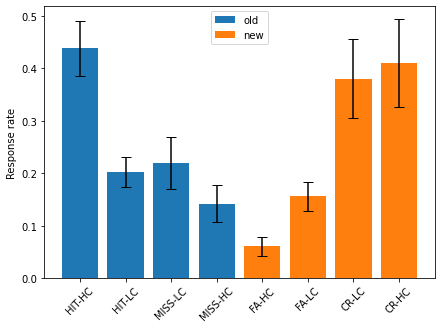

In [69]:
categories_old = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC']
categories_new = ['FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']

df_old = types_df.iloc[:, :4]
df_new = types_df.iloc[:, 4:]

def confidence_level(data):
    std = np.std(data, ddof=0)
    n = len(data)
    return 1.96 * std / np.sqrt(n)

# confidence_level function calculates 95% confidence level

old_errors = df_old.agg(confidence_level)
old_means = df_old.agg(np.mean)

new_errors = df_new.agg(confidence_level)
new_means = df_new.agg(np.mean)

plt.figure(figsize = (7, 5))
plt.bar(categories_old, old_means, yerr = old_errors, capsize=5, label='old')
plt.bar(categories_new, new_means, yerr = new_errors, capsize=5, label='new')
plt.legend()
plt.ylabel('Response rate')
plt.xticks(rotation=45)
plt.show()

# 10.
For the second histogram, you should calculate scores for location memory for old objects only(of course).
For this calculation, you should ignore the trials whose second response is 5
Please note that the second response for the new object is 0

In [70]:
old_category_types = {'HIT-HC':[], 'HIT-LC':[], 'MISS-LC':[], 'MISS-HC':[]}

def calculate_memory_score(subjectID):
    test = pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(subjectID, subjectID), sep='\t', index_col = False)
    test = test[test['Task_Type'] == 0]
    test['Response'] = classification(test)
    test = test[test['Res2']!=5]
    study = pd.read_csv('./DMdata/DM{}/DM{}_study.txt'.format(subjectID, subjectID), sep='\t', index_col = False)
    
    old_category_types = {'HIT-HC':[], 'HIT-LC':[], 'MISS-LC':[], 'MISS-HC':[]}
    categories_old = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC']
    
    for category in categories_old:
        test_tmp = test[test['Response']==category].reset_index()
        cnt = 0
        
        for i in range(len(test_tmp)):
            Obj_ID = test_tmp.loc[i, 'Object_ID']
            cnt += (test_tmp.loc[i, 'Res2'] == study[study['ObjID'] == Obj_ID].reset_index().loc[0, 'LocID'])
        
        if (len(test_tmp)==0):
            old_category_types[category].append(0)
        else:
            old_category_types[category].append(cnt/len(test_tmp))
    
    result = [old_category_types['HIT-HC'][0], old_category_types['HIT-LC'][0], old_category_types['MISS-LC'][0], old_category_types['MISS-HC'][0]]
    
    return result


strings = [*map(str, range(1, 32))]
ID = [str(string).zfill(2) for string in strings]

for id in ID:
    memory_score_by_ID = calculate_memory_score(id)
    
    categories_old = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC']
    for i in range(len(categories_old)):
        old_category_types[categories_old[i]].append(memory_score_by_ID[i])
            
old_category_types = pd.DataFrame(old_category_types)

old_category_types

,HIT-HC,HIT-LC,MISS-LC,MISS-HC
0,0.888199,0.444444,0.600000,0.000000
1,0.459459,0.347826,0.000000,0.000000
2,0.917808,1.000000,0.666667,0.000000
3,0.555556,0.500000,0.600000,0.367647
4,0.655738,0.000000,0.000000,0.000000
5,0.552381,0.425000,0.210526,0.225000
6,0.593220,0.294118,0.545455,0.210526
7,0.962963,0.285714,0.500000,0.000000
8,0.822581,0.567568,0.000000,0.000000
9,0.448276,0.105263,0.000000,0.000000


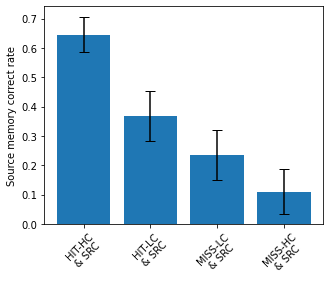

In [71]:
def confidence_level(data):
    std = np.std(data, ddof=0)
    n = len(data)
    return 1.96 * std / np.sqrt(n)

# confidence_level function calculates 95% confidence level

errors_old = old_category_types.agg(confidence_level)
mean_memory_score = old_category_types.agg(np.mean)

x = ['HIT-HC\n& SRC', 'HIT-LC\n& SRC', 'MISS-LC\n& SRC', 'MISS-HC\n& SRC']

plt.figure(figsize = (5, 4))
plt.bar(x, mean_memory_score, yerr = errors_old, capsize = 5)
plt.ylabel('Source memory correct rate')
plt.xticks(rotation=45)
plt.show()

# 11.
You can add a line indicating the chance level of location memory score, which is 0.25

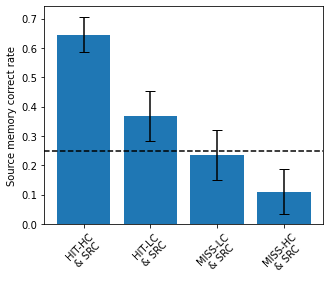

In [72]:
def confidence_level(data):
    std = np.std(data, ddof=0)
    n = len(data)
    return 1.96 * std / np.sqrt(n)

# confidence_level function calculates 95% confidence level

errors_old = old_category_types.agg(confidence_level)
mean_memory_score = old_category_types.agg(np.mean)

x = ['HIT-HC\n& SRC', 'HIT-LC\n& SRC', 'MISS-LC\n& SRC', 'MISS-HC\n& SRC']

plt.figure(figsize = (5, 4))
plt.bar(x, mean_memory_score, yerr = errors_old, capsize = 5)
plt.ylabel('Source memory correct rate')
plt.xticks(rotation=45)
plt.axhline(0.25, color="black", linestyle='--')
plt.show()